In [5]:
#tutotiral em 'https://elitedatascience.com/python-seaborn-tutorial'
# Matplotlib for additional customization
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns


# Read dataset
df = pd.read_csv('pokemon.csv', 
                 index_col=0,
                 encoding = "ISO-8859-1") #coloquei o enconding

# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


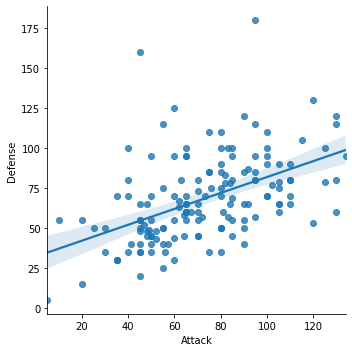

In [6]:
#scatter plot 

# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

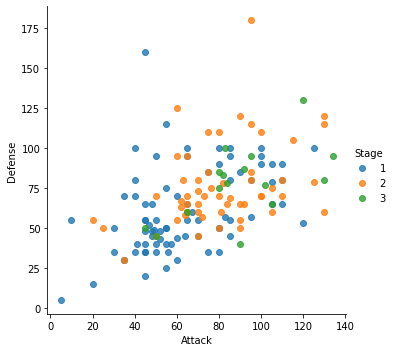

In [7]:
# Scatterplot arguments
sns.lmplot(x='Attack', 
           y='Defense', 
           data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0.0, 140.45)

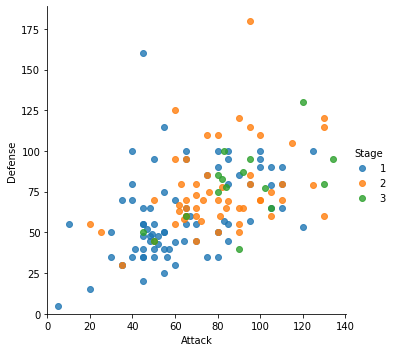

In [8]:
#usando matplotlib para ajustar os limites do gráfico
# Plot using Seaborn
sns.lmplot(x='Attack', 
           y='Defense', 
           data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

#documentação para customizar a matplotlib https://matplotlib.org/users/pyplot_tutorial.html

<AxesSubplot:>

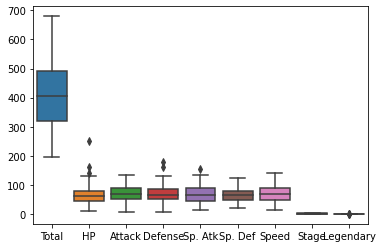

In [9]:
#step 5 o papel do Pandas

# Boxplot
sns.boxplot(data=df)

<AxesSubplot:>

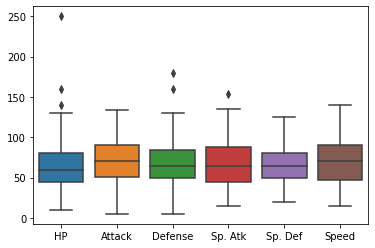

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)
#pandas em 10 min https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

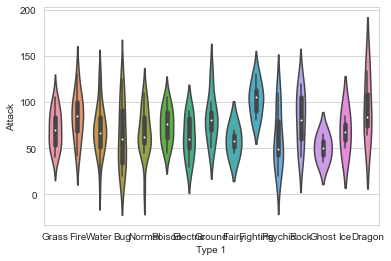

In [11]:
#Step 6 : temas do seaborn

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

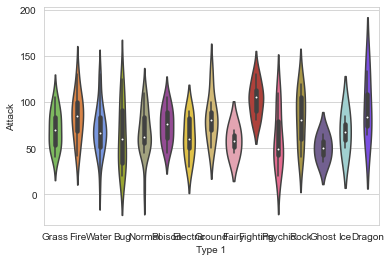

In [12]:
#Step 7: Paleta de Cores

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1',
               y='Attack',
               data=df, 
               palette=pkmn_type_colors) # Set color palette

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

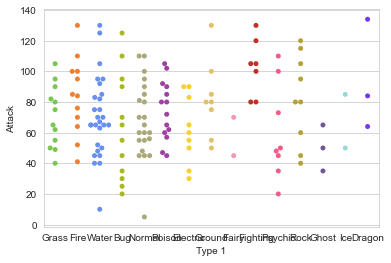

In [13]:
# Swarm plot with Pokemon color palette, para ver os pontos da dispersão, usado qdo tem poucos pontos?
sns.swarmplot(x='Type 1',
              y='Attack', 
              data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

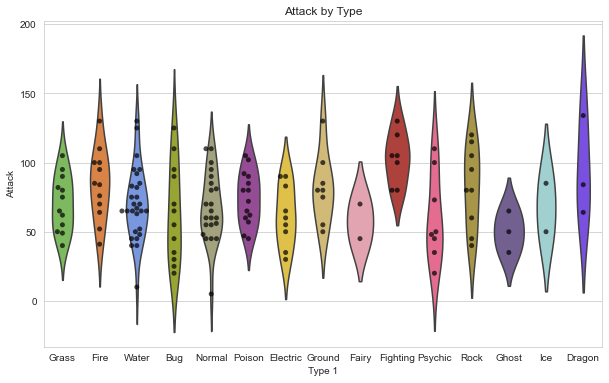

In [14]:
#Step 8: Combinando os gráficos
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [15]:
#Step 9: Colocando tudo junto !
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


<AxesSubplot:xlabel='Stat', ylabel='value'>

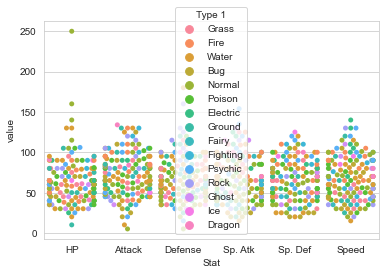

In [16]:
sns.swarmplot(x='Stat',
              y='value',
              data=melted_df, 
              hue='Type 1')

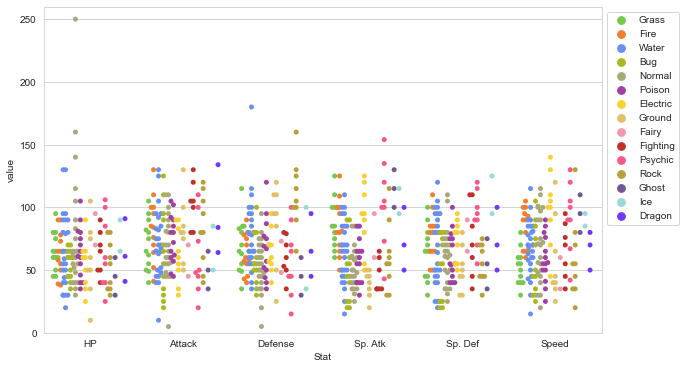

In [18]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:>

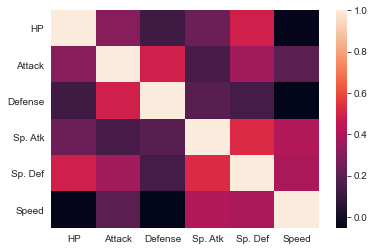

In [20]:
#Step 10: Pokemon mini-galery
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

<AxesSubplot:xlabel='Attack'>

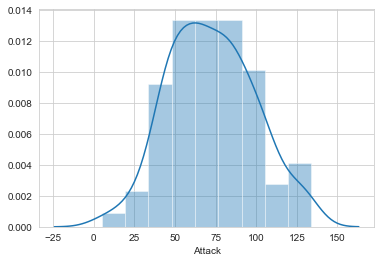

In [21]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

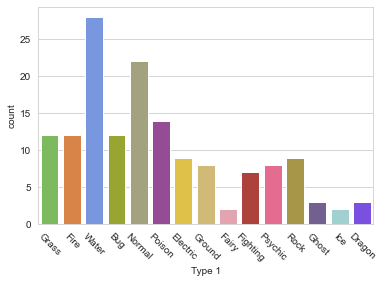

In [22]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


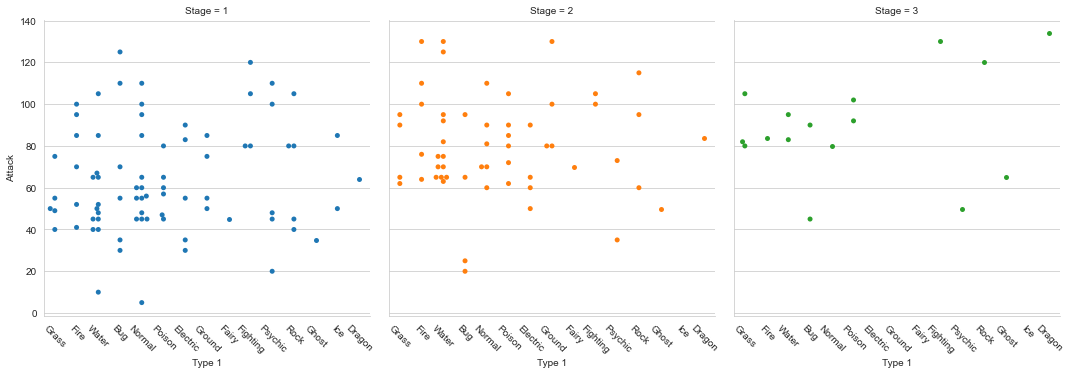

In [23]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

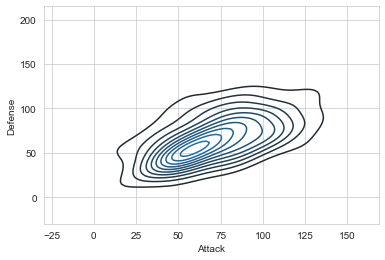

In [24]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

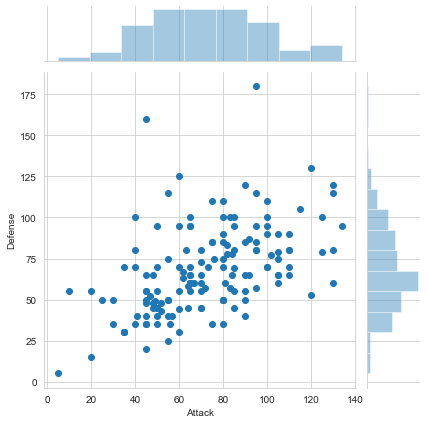

In [25]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
